# Task 1

A simple game will be developed with a rectengular grid consisting of random integers between 0 and 9. An agent starts at the upper-left corner of the grid and must reach the lower-right corner of the grid as fast as possible. The time spent on a cell is the number on this cell. 

In order to solve this problem, 3 algorithms will be provided:

• A first baseline naive search algorithmthat is better than random movements.
• Dijkstra's algorithm
• Ant colony optimization algorithm


## Creating the Game Board

In [3]:
import numpy as np

def create_board(rows,columns, display_grid=True):
    
    board= np.random.randint(1, 10, size=(rows,columns))
    if display_grid == True:
        print(f"\nCreated {rows} by {columns} grid...\n")
        print("-" * (4 * columns + 1))

        for row in board:
            for el in row:
                print(f"| {el} ",end="")
            print("|")
            print("-" * (4 * columns + 1))
   
    return board

We will create a board to use with 3 different algorithms. 

In [2]:
board = create_board(10, 10)


Created 10 by 10 grid...

-----------------------------------------
| 6 | 4 | 9 | 7 | 2 | 6 | 3 | 9 | 2 | 3 |
-----------------------------------------
| 3 | 5 | 2 | 2 | 7 | 1 | 6 | 9 | 9 | 2 |
-----------------------------------------
| 8 | 2 | 9 | 9 | 9 | 1 | 9 | 8 | 8 | 5 |
-----------------------------------------
| 6 | 7 | 1 | 1 | 4 | 3 | 4 | 3 | 5 | 5 |
-----------------------------------------
| 6 | 5 | 1 | 1 | 7 | 3 | 8 | 5 | 8 | 7 |
-----------------------------------------
| 9 | 6 | 4 | 8 | 6 | 3 | 8 | 1 | 3 | 4 |
-----------------------------------------
| 9 | 6 | 7 | 4 | 2 | 5 | 5 | 7 | 4 | 1 |
-----------------------------------------
| 4 | 5 | 1 | 1 | 7 | 6 | 4 | 2 | 5 | 6 |
-----------------------------------------
| 8 | 5 | 5 | 1 | 6 | 7 | 8 | 7 | 9 | 9 |
-----------------------------------------
| 3 | 4 | 7 | 1 | 2 | 2 | 8 | 1 | 8 | 3 |
-----------------------------------------


## Naive Aproach

In [5]:
from timeit import default_timer as timer

class NaiveApp():
    """ The naive approach class attempts to find the shortest route for a given grid.

    It accepts the number in the cell as the time it takes to pass that cell.
    It starts from the top left and only moves right or downwards at each step to reach
    the bottom right cell. It inspects the cell below and the cell on the right and chooses
    the one with the minimum time cost.

    Args:
        grid: Numpy array representing the grid to solve.

    Attributes:
        grid: Numpy array representing the grid to solve.
        rows: Number of rows of the grid provided.
        columns: Number of columns of the grid provided.
        path_chosen: List of tuples representing the cell coordinates on the quickest path.

    Private Attributes:
        neighbours: Adjacent cells below and on the right.
        current_cell: Current cell being visited.
        final_cell: The bottom right cell, the "target cell".

    """
    def __init__(self, grid):
        self.grid = grid
        self.rows = grid.shape[0]
        self.columns = grid.shape[1]
        self.__neighbours = []
        self.__current_cell = (0, 0)
        self.path_chosen = []
        self.__final_cell = (self.rows - 1, self.columns - 1)

    def compute(self):
        """ This class method computes the shortest path.

        Returns:
            The shortest path chosen as a list of coordinate tuples
            The time taken to compute the shortest path.

        """

        start = timer()

        while True:
            self.path_chosen.append(self.__current_cell)
            if self.__current_cell == self.__final_cell:
                break
            self.__get_neighbours(self.__current_cell[0], self.__current_cell[1])
            self.__current_cell = self.__choose_cell()
            self.__neighbours.clear()

        self.path_chosen.pop(0)
        end = timer()
        return self.path_chosen, end-start

    def __get_neighbours(self, i, j):
        """ The class method finds the adjacent cell below and on the right.

        Args:
            i: The row coordinate of the current cell.
            j: The column coordinate of the current cell.

        Returns:
            None. Adds the coordinates of the cell to self.__neighbours list.

        """
        if i + 1 < self.rows:
            self.__neighbours.append((i+1, j))
        if j + 1 < self.columns:
            self.__neighbours.append((i, j+1))

    def __choose_cell(self):
        """ The class method chooses the next cell to visit.

        It inspects neighbour cells and chooses the one with the minimum time cost.

        Returns:
            The coordinates of the next cell as a tuple

        """
        min_cell_value = 10
        min_cell = []

        for cell in self.__neighbours:
            if self.grid[cell] < min_cell_value:
                min_cell_value = self.grid[cell]
                min_cell = cell

        return min_cell


In [4]:
board_solver = NaiveApp(board)
shortest_path, time = board_solver.compute()
print(f"Shortest path found: {shortest_path}\nTime taken to solve: {time}")

Shortest path found: [(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (6, 6), (7, 6), (7, 7), (7, 8), (7, 9), (8, 9), (9, 9)]
Time taken to solve: 4.7200000000025e-05


## Dijkstra's algorithm

In [6]:
import sys

MAX_INT = sys.maxsize

class Dijkstras():
    """ This class uses Dijkstras algorithm to find the quickest route for a given grid.

    It accepts the number in the cell as the time it takes to pass that cell.
    It starts from the top left and tries to reach the bottom right cell.

    Args:
        grid : Numpy array representing the grid to solve.

    Attributes:
        grid: Numpy array representing the grid to solve.
        rows: Number of rows of the grid provided.
        columns: Number of columns of the grid provided.
        visited: List of coordinate tuples for visited cells.
        shortest_dist_to_start: Numpy array with the minimum distance for each cell.
        previous_cell: Numpy array with previous cells on the quickest path from starting cell.
        shortest_path: List of tuples representing the cell coordinates on the quickest path.

    Private Attributes:
        neighbours: List of coordinate tuples for adjacent cells.
        current_cell: Tuple for coordinates of the current cell being visited.
        closest_unvisited: Numpy array with the minimum distances to start for unvisited cells only.
                        This array is used to select the next cell to visit.
                        The distances for the visited cells are set to MAX_INT so they aren't chosen again.
    """
    def __init__(self, grid):
        self.grid = grid
        self.rows = grid.shape[0]
        self.columns = grid.shape[1]
        self.visited = []
        self.__neighbours = []
        self.__current_cell = ()
        self.shortest_dist_to_start = np.full((self.rows, self.columns), MAX_INT, "int")
        self.__closest_unvisited = np.full((self.rows, self.columns), MAX_INT, "int")
        self.previous_cell = np.zeros((grid.shape[0], grid.shape[1], 2), "int")
        self.shortest_path = []

    def compute(self):
        """Solve the grid to find and print the shortest path.

        Returns:
            The shortest path as a list of coordinate tuples.
            The time taken to compute the shortest path.
            The time cost of reaching the last cell with the shortest path.
            Numpy array with shortest distance to start for each cell.

        """
        start = timer()
        self.shortest_dist_to_start[0, 0] = 0
        self.__current_cell = (0, 0)

        while True:
            self.__get_neighbours_unvisited(self.__current_cell[0], self.__current_cell[1])
            self.__update_neighbours()
            self.visited.append(self.__current_cell)
            if len(self.visited) == (self.rows * self.columns):
                break
            # Set the distance for current cell to MAX_INT in __closest_unvisited so the cell
            # will not be chosen again for visitation. 
            self.__closest_unvisited[self.__current_cell] = MAX_INT
            self.__current_cell = self.__choose_next_cell_to_visit()
            self.__neighbours.clear()

        self.create_shortest_path()
        end = timer()
        time = round(end - start, 5)
        time_to_last_cell = self.shortest_dist_to_start[self.rows-1, self.columns-1]
        times_to_start = self.shortest_dist_to_start
        return self.shortest_path, time, time_to_last_cell, times_to_start

    def __update_neighbours(self):
        """Makes updates for each neighbour cell.

        Updates the min. distance to start and previous cell on the route.

        Returns:
            None. Updates self.shortest_dist_to_start, closest_unvisited & self.previous_cell.

        """
        for neighbour in self.__neighbours:
            new_dist_to_start  = self.shortest_dist_to_start[self.__current_cell] + self.grid[neighbour]
            if new_dist_to_start < self.shortest_dist_to_start[neighbour]:
                self.shortest_dist_to_start[neighbour] = new_dist_to_start
                self.__closest_unvisited[neighbour] = new_dist_to_start
                self.previous_cell[neighbour] = self.__current_cell

    def __choose_next_cell_to_visit(self):
        """Choose the next unvisited cell that is closest to the starting point.

        Returns:
            Tuple of coordinates for the next cell to visit.

        """
        next_cell_to_visit = (np.unravel_index(self.__closest_unvisited.argmin(), self.__closest_unvisited.shape))
        return next_cell_to_visit

    def __get_neighbours_unvisited(self, i, j):
        """ The class method finds the unvisited adjacent cells.

        Args:
            i: The row coordinate of the current cell.
            j: The column coordinate of the current cell.

        Returns:
            None. Runs __check_if_visited function for each neighbour.

        """
        if i + 1 < self.rows:
            self.__check_if_visited(i+1, j)
        if i - 1 >= 0:
            self.__check_if_visited(i-1, j)
        if j + 1 < self.columns:
            self.__check_if_visited(i, j+1)
        if j - 1 >= 0:
            self.__check_if_visited(i, j-1)

    def __check_if_visited(self, i, j):
        """ The class method checks if the provided cells have been visited.

        Args:
            i: The row coordinate of the cell to check.
            j: The column coordinate of the cell to check.

        Returns:
            None. Appends cell coordinates to self.__neighbours if not visited.

        """
        if (i, j) not in self.visited:
            self.__neighbours.append((i, j))

    def create_shortest_path(self):
        """ Creates the shortest path from self.previous_cell.

        Returns:
           List of tuples representing the shortest path.

        """
        last_cell_visited = (self.rows-1, self.columns-1)
        while last_cell_visited != (0, 0):
            self.shortest_path.append(last_cell_visited)
            last_cell_visited = tuple(self.previous_cell[last_cell_visited])
        self.shortest_path.reverse()
        return self.shortest_path


In [6]:
board_solver = Dijkstras(board)
shortest_path, time, to_last_cell, to_start = board_solver.compute()
print(f"Shortest path found: {shortest_path}\nTime taken to solve: {time}")
print(f"Total time to last cell: {to_last_cell}")
print(f"Distances to start:\n {to_start}")

Shortest path found: [(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (7, 3), (8, 3), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
Time taken to solve: 0.00333
Total time to last cell: 58
Distances to start:
 [[ 0  4 13 19 21 26 29 38 40 43]
 [ 3  8 10 12 19 20 26 35 44 45]
 [11 10 19 21 28 21 30 38 44 46]
 [17 17 18 19 23 24 28 31 36 41]
 [23 22 19 20 27 27 35 36 44 48]
 [32 28 23 28 33 30 38 37 40 44]
 [41 34 30 32 34 35 40 44 44 45]
 [40 36 31 32 39 41 44 46 49 51]
 [48 41 36 33 39 45 52 53 58 60]
 [48 45 41 34 36 38 46 47 55 58]]


## Ant Colony Optimization

In [7]:
class Aco():
    """ This class uses Ant Colony Optimization to find the quickest route for a given grid.

    It accepts the number in the cell as the time it takes to pass that cell.
    It starts from the top left and tries to reach the bottom right cell.

    Args:
        grid : Numpy array representing the grid to solve.

    Attributes:
        grid: Numpy array representing the grid to solve.
        rows: Number of rows of the grid provided.
        columns: Number of columns of the grid provided.
        ants: Number of ants to send to explore the grid.
        its: Number of iterations to repeat the algorithm.
        evap: Evaporation rate.
        pheromone: The amount of pheromone to be deposited by each ant.
        pheromone_matrix: Numpy array to hold total pheromone deposit for all cells.

    Private Attributes:
        visited: Nested list of coordinate lists of visited cells for each ant.
        delta_pheromones: List of the delta_pheromone for each ant.
        neighbours: List of lists with coordinates of the adjacent cells.
        current_cell: List that holds coordinates of the current cell being visited.
        final_cell: List that holds coordinates of the last cell.
        distance_travelled: Total distance travelled by an ant.

    """

    def __init__(self, grid, ants=1000, iteration=10, evaporation=0.1, pheromone_per_ant=100):
        self.grid = grid
        self.rows = grid.shape[0]
        self.columns = grid.shape[1]
        self.ants = ants
        self.its = iteration
        self.evap = evaporation
        self.pheromone = pheromone_per_ant
        self.__visited = []
        self.__delta_pheromones = []
        self.__neighbours = []
        self.pheromone_matrix = np.ones((self.rows, self.columns))
        self.__current_cell = []
        self.__final_cell = [self.rows - 1, self.columns - 1]
        self.__distance_travelled = 0

    def compute(self):
        """Computes ACO algorithm.

        Returns:
            Pheromone matrix showing path usage.
            The time taken to compute the shortest path.

        """
        start = timer()
        for iteration in range(self.its):
            self.__visited.clear()
            self.__delta_pheromones.clear()
            for ant in range(self.ants):
                self.__distance_travelled = 0
                self.__current_cell = [0, 0]
                self.__visited.append([])
                while True:
                    i, j = self.__current_cell[0], self.__current_cell[1]
                    self.__move_to(i, j)
                    if self.__current_cell == self.__final_cell:
                        delta_pheromone = self.pheromone / self.__distance_travelled
                        self.__delta_pheromones.append(delta_pheromone)
                        break
                    self.__neighbours.clear()
                    self.__get_neighbours_unvisited(i, j)
                    if not self.__neighbours:
                        del self.__visited[-1]
                        break
                    if len(self.__neighbours) == 1:
                        self.__current_cell = self.__neighbours[0]
                    else:
                        self.__current_cell = self.__choose_cell()
            self.vaporise_pheromone()
            self.add_pheromone()
            #print(f"{len(self.__visited)} ants reached target")
        results = np.round(self.pheromone_matrix)
        end = timer()
        return results, end-start

    def vaporise_pheromone(self):
        """Vaporizes the pheromone on the grid after each ant.

        Returns:
            None.

        """
        self.pheromone_matrix *= (1 - self.evap)

    def __move_to(self, i, j):
        """Simulates moving to a new cell.

        Args:
            i: The row coordinate of new cell.
            j: The column coordinate of the new cell.

        Returns:
            None. Updates self.__visited & self.__distance_travelled lists.

        """
        self.__visited[-1].append([i, j])
        self.__distance_travelled += self.grid[i, j]

    def __get_neighbours_unvisited(self, i, j):
        """ The class method finds the unvisited adjacent cells.

        Args:
            i: The row coordinate of the current cell.
            j: The column coordinate of the current cell.

        Returns:
            None. Runs __check_visited function for each neighbour.

        """
        if i + 1 < self.rows:
            self.__check_visited(i+1, j)
        if i - 1 >= 0:
            self.__check_visited(i-1, j)
        if j + 1 < self.columns:
            self.__check_visited(i, j+1)
        if j - 1 >= 0:
            self.__check_visited(i, j-1)

    def __check_visited(self, i, j):
        """ The class method checks if the provided cells have been visited.

        Args:
            i: The row coordinate of the cell to check.
            j: The column coordinate of the cell to check.

        Returns:
            None. Appends cell coordinates to self.__neighbours if not visited.

        """
        if [i, j] not in self.__visited[-1]:
            self.__neighbours.append([i, j])
        return 0

    def __choose_cell(self):
        """ The class method chooses which neighbour to visit next.

        It calculates the probability of choosing each neighbour and makes a random choice.

        Returns:
            A list holding the coordinates of the next cell to visit.

        """
        neighbours_total = 0
        neighbour_no = len(self.__neighbours)
        probability = np.zeros(neighbour_no)

        for i, cell in enumerate(self.__neighbours):
            visibility = 1 / self.grid[cell[0], cell[1]]
            cell_pheromone = self.pheromone_matrix[cell[0], cell[1]]
            neighbours_total += visibility * cell_pheromone
            probability[i] = visibility * cell_pheromone

        probability /= neighbours_total
        #normalisation in case sum not equal to 1
        probability /= probability.sum()
        return self.__neighbours[np.random.choice(neighbour_no, p=probability)]

    def add_pheromone(self):
        """ The class method adds_pheromone to visited cells at the end of each iteration.

        Returns:
            None. Adds delta_pheromone to pheromone_matrix numpy array for visited cells.

        """
        for ant in range(len(self.__visited)):
            for cell in self.__visited[ant]:
                self.pheromone_matrix[cell[0], cell[1]] += self.__delta_pheromones[ant]


In [8]:
board_solver = Aco(board)
result, time = board_solver.compute()
print(f"Pheromone deposit matrix showing path usage:\n {result}")
print(f"Time taken to solve:{time}") 

Pheromone deposit matrix showing path usage:
 [[1814.  672.  316.  331.  376.  223.  110.   52.   53.   49.]
 [1520. 1645. 1073.  995.  792.  892.  112.   24.   24.   55.]
 [ 779. 1157.  433.  239.   67.  898.  145.   39.   40.   56.]
 [ 415.  831. 1258. 1191.  441.  967.  276.  256.  101.   72.]
 [ 284.  446. 1283. 1181.  307.  736.   87.  239.   63.   63.]
 [ 198.  453.  894.  401.  397.  683.  102.  361.  306.  201.]
 [ 149.  260.  746.  748.  644.  523.  159.  207.  329.  383.]
 [ 102.  209.  868. 1450.  143.  156.  255.  410.  292.  346.]
 [  33.   78.  175. 1453.   67.  167.  157.  333.  123.  312.]
 [  11.   19.   20. 1441. 1452. 1460. 1426. 1592. 1523. 1814.]]
Time taken to solve:8.586980544


## Comparison of Execution Times

In [9]:
import matplotlib.pyplot as plt

def evaluate(grid_sizes, algorithm, title):
    times_history = []
    board_sizes = []
    for grid_size in grid_sizes:
        board = create_board(grid_size[0], grid_size[1], display_grid = "False")
        if algorithm == "naive_approach":
            board_solver = NaiveApp(board)
        if algorithm == "dijkstras":
            board_solver = Dijkstras(board)
        if algorithm == "aco":
            board_solver = Aco(board)
        time_taken = board_solver.compute()[1]
        times_history.append(time_taken)
        board_size = grid_size[0] * grid_size[1]
        board_sizes.append(board_size)

       
    plt.figure(figsize=(16,8))  
    fig, ax = plt.subplots()
    graph = ax.plot(board_sizes, times_history)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel("Board sizes in number of total cells", fontsize=15)
    ax.set_ylabel("Time taken in seconds", fontsize=15)
    plt.show()
    

<Figure size 1152x576 with 0 Axes>

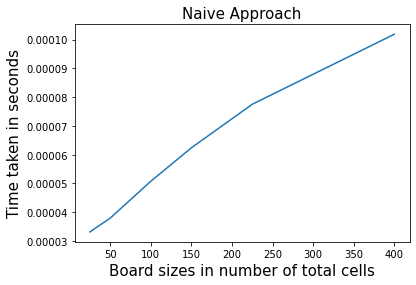

In [16]:
grids_to_test = [(5,5), (5,10), (10,10), (10,15), (15,15), (20, 20)]
evaluate(grids_to_test, "naive_approach", "Naive Approach")

<Figure size 1152x576 with 0 Axes>

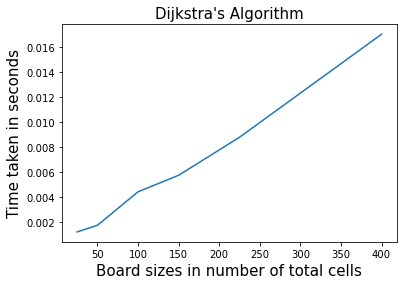

In [12]:
evaluate(grids_to_test, "dijkstras", "Dijkstra's Algorithm")

<Figure size 1152x576 with 0 Axes>

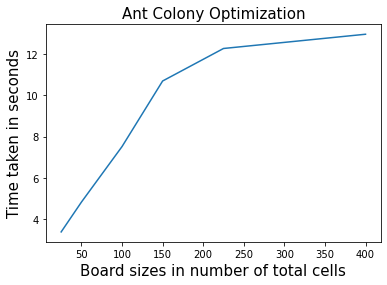

In [14]:
evaluate(grids_to_test, "aco", "Ant Colony Optimization")